In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


### 배경 설명

UN에서 발간한 2015 ~ 2019년 세계행복지수 데이터. 각 국가의 행복지수를 사람들에게 0~10 중 점수를 매기게하여 평균을 낸 점수 (Happiness score)

Happiness score - 6가지 변수 (경제, 가족, 건강, 자유, 부패도, 관대함)의 점수를 합산한 점수 = Dystopia Residual

Dystopia Residual은 6가지 요소로 행복지수를 설명이 불가능한 요소들을 의미



### 핵심 질문

1. 어떤 국가, 지역이 일반적으로 가장 행복/불행한가?
2. 국가별 시간에 따른 경제력 대비 행복지수의 변화는?
3. 6가지 요소로 보다 정밀하게 Hapinness score를 예측할 수 있을까?
4. 어떤 요소가 행복지수에 가장 큰 영향을 미칠까?



### 분석 결과

#### 국가/지역별 행복지수

1. 비교적 경제적으로 부유한 북미, 서유럽, 북유럽, 호주 등의 행복지수가 높은 편입니다
2. 북아프리카를 제외하면 아프리카 대륙의 대부분의 국가들은 평균보다 행복지수가 낮은 편입니다
3. 일반적으로 GDP가 높으면 행복지수가 올라갈거라는 생각과는 달리, 한국과 일본에 비해 브라질이나 아르헨티나, 칠레,리비아, 알제리, 카자흐스탄, 태국의 행복지수가 높거나 비슷합니다.



#### 6가지 변수의 상관관계

1. 강한 음의 상관관계를 가지는 변수들의 조합은 없다
2. 행복지수 / 경제력 + 가족 + 건강은 강한 양의 상관관계를 지닌다. 이 4가지 조합은 서로 강한 상관관계 
3. 일반적으로 사람들의 행복지수가 높을 수록 Generosity가 높을 것이라고 가정했으나 (기분이 좋아질때 남들에게 좀 더 관대해지는 개인적인 경험으로) 실제로는 0.18로 약한 상관관계를 보였다 
4. 행복지수와 Dystopia Residual이 중간 정도의 양의 상관관계를 보이는 것으로 보아, 행복지수가 높은 국가들일수록 행복에 긍정적인 영향을 끼치는 요소가 더 많다고 가정을 할 수 있다.


#### 2015년 - 경제력 대비 행복지수 비교

그룹 A ~ C: 경제력 대비 행복지수 매우 높음 -> 높음 -> 조금 높음 순
그룹 D ~ F: 경제력 대비 행복지수 조금 낮음 -> 낮음 -> 매우 낮음 순

1. 중남미 대륙의 경우 온두라스를 제외하면 전부 그룹 A~B에 속한다
2. 반면 동북아시아 3국은 그룹 D~E에 속한다.
3. 리비아, 카자흐스탄은 의외로 경제력이 높다
4. 인도와 파키스탄은 의외로 경제력 대비 행복지수가 크게 차이가 난다
5. 소말리아는 의외로 그룹 A에 속한다
6. 같은 콩고인데 콩고 민주 공화국은 행복지수가 경제력 대비 높은 편이고 콩고 공화국은 매우 낮은 편. 
7. 동아시아에 비해 중남미는 경제력 대비 행복지수가 큰 편.
8. GPT는 가족과의 유대감 등으로 설명했으나 Family 지수는 비슷한 편.
9. 중남미의 비교적 자유로운 사회적 분위기? 동아시아의 높은 교육열 등이 원인일까?
10. 해당 원인들에 대해 분석하는 것은 비교적 복잡하고, 주관적인 의견이 들어갈 수밖에 없으므로 여기까지만 분석하도록 한다.
<br><br><br>

#### 2015~2019년도 경제력 대비 행복지수 비교


1. 2015년부터 2019년 까지 주로 경제력 대비 행복지수가 낮아지는 경향을 보였다.
2. 베네수엘라는 2015~2018년까지 정치적 불안으로 인해 (부정선거, 반정부 시위 등) 경제력 대비 행복지수가 급격하게 낮아지는 모습을 보였다
3. 남미대륙의 대부분의 국가들 역시 브라질, 볼리비아를 제외하면 전부 1~2단계 떨어진다
4. 동남아시아 국가들 역시 마찬가지. 대체적으로 경제력 대비 행복지수가 떨어진다
5. 영국은 브렉시트 이후 경제력 대비 행복지수 증가


#### 행복지수 예측

LinearRegression, RandomForest, XGB 모다





<span style = "font-size: 18px;"> 

**EDA 프로세스**

1. 가장 행복지수가 높은 지역은? 낮은 지역은?

</span>

In [2]:
df_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
df_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

df_2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 'Happiness.Score' : 'Happiness Score',
                         'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                         'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'}, inplace = True)
df_2018.rename(columns = {"Overall rank" : 'Happiness Rank', 'Score' : 'Happiness Score', 'Country or region' : 'Country', 'GDP per capita' : 'Economy (GDP per Capita)',
                         "Social support" : "Family", 'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                         'Perceptions of corruption' : 'Trust (Government Corruption)'}, inplace = True)
df_2019.rename(columns = {"Overall rank" : 'Happiness Rank', 'Score' : 'Happiness Score', 'Country or region' : 'Country', 'GDP per capita' : 'Economy (GDP per Capita)',
                         "Social support" : "Family", 'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                         'Perceptions of corruption' : 'Trust (Government Corruption)'}, inplace = True)



df_2017 = df_2017.merge( df_2015[['Country', 'Region']], how = 'inner', on = 'Country')
cols = ['Country', 'Region'] + [col for col in df_2017.columns if col not in ['Country', 'Region']]
df_2017 = df_2017[cols]
df_2018 = df_2018.merge( df_2015[['Country', 'Region']], how = 'inner', on = 'Country')
cols = ['Country', 'Region'] + [col for col in df_2018.columns if col not in ['Country', 'Region']]
df_2018 = df_2018[cols]
df_2019 = df_2019.merge( df_2015[['Country', 'Region']], how = 'inner', on = 'Country')
cols = ['Country', 'Region'] + [col for col in df_2019.columns if col not in ['Country', 'Region']]
df_2019 = df_2019[cols]




In [3]:
df_happiness = df_2015[['Country','Region', 'Happiness Score']].merge(df_2016[['Country','Region', 'Happiness Score']], on = ['Country', 'Region'], how = 'outer', suffixes = ('_2015', '_2016'))
df_happiness = df_happiness.merge(df_2017[['Country','Region', 'Happiness Score']], on = ['Country', 'Region'], how = 'outer')
df_happiness.rename(columns = {'Happiness Score' : "Happiness Score_2017" }, inplace = True)
df_happiness = df_happiness.merge(df_2018[['Country','Region', 'Happiness Score']], on = ['Country', 'Region'], how = 'outer')
df_happiness.rename(columns = {'Happiness Score' : "Happiness Score_2018" }, inplace = True)
df_happiness = df_happiness.merge(df_2019[['Country','Region', 'Happiness Score']], on = ['Country', 'Region'], how = 'outer')
df_happiness.rename(columns = {'Happiness Score' : "Happiness Score_2019" }, inplace = True)
df_happiness['country_avg'] = df_happiness[['Happiness Score_2015', 'Happiness Score_2016', 'Happiness Score_2017', 'Happiness Score_2018', 'Happiness Score_2019']].mean(axis =1)
sort_country = df_happiness.sort_values('country_avg', ascending = True)


In [4]:


fig = px.choropleth(
    df_happiness,
    locations = "Country",
    locationmode = 'country names',
    color = 'country_avg',
    hover_name = 'Country',
    color_continuous_scale = px.colors.diverging.RdBu[::1],
    title = 'World Happiness Score by Country'
)


fig.show()


1. 비교적 경제적으로 부유한 북미, 서유럽, 북유럽, 호주 등의 행복지수가 높은 편입니다
2. 북아프리카를 제외하면 아프리카 대륙의 대부분의 국가들은 평균보다 행복지수가 낮은 편입니다
3. 일반적으로 GDP가 높으면 행복지수가 올라갈거라는 생각과는 달리, 한국과 일본에 비해 브라질이나 아르헨티나, 칠레,리비아, 알제리, 카자흐스탄, 태국의 행복지수가 높거나 비슷합니다. 

<span style = 'font-size: 18px;'>
    
2. 각 변수별 상관관계는?
   

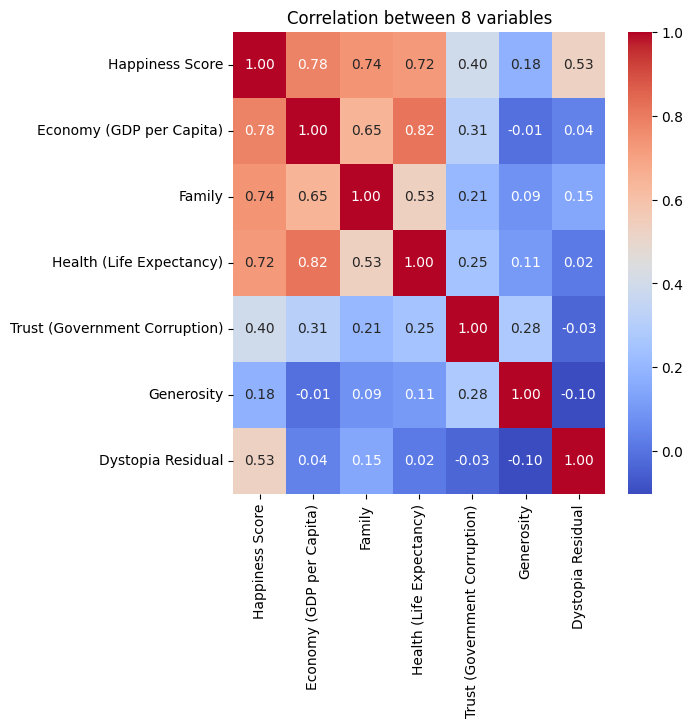

In [21]:
col = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
subset_df = df_2015[col]
corr_matrix = subset_df.corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', cbar = True)

plt.title('Correlation between 8 variables')
plt.show()

<span style = 'font-size: 16px;'>
1. 강한 음의 상관관계를 가지는 변수들의 조합은 없다 <br><br>
2. 행복지수 / 경제력 + 가족 + 건강은 강한 양의 상관관계를 지닌다. 이 4가지 조합은 서로 강한 상관관계 <br><br>
3. 일반적으로 사람들의 행복지수가 높을 수록 Generosity가 높을 것이라고 가정했으나 (기분이 좋아질때 남들에게 좀 더 관대해지는 개인적인 경험으로) 실제로는 0.18로 약한 상관관계를 보였다 <br><br>
4. 행복지수와 Dystopia Residual이 중간 정도의 양의 상관관계를 보이는 것으로 보아, 행복지수가 높은 국가들일수록 행복에 긍정적인 영향을 끼치는 요소가 더 많다고 가정을 할 수 있다. <br><br>
</span>




<span style = 'font-size: 16px;'>
    
3. 국가들을 유형별로 나누자
앞서 보았던것처럼, <br>

A. 경제력이 높고 행복지수도 높은 북유럽/서유럽/호주/북미 <br> 
B. 경제력이 높으나 행복지수는 낮은 한국/일본 <br>
C. 경제력이 상대적으로 낮으나 행복지수가 상대적으로 높은 브라질/아르헨티나/칠레/카자흐스탄/리비아/알제리/태국 <br>
D. 경제력이 낮고 행복지수도 낮은 개발도상국들 <br>

등 여러 그룹들이 존재하였다. 그렇다면 행복지수가 관계가 적은 Generosity 변수를 제외하고 한 번 클러스터링을 해보고 분석해보자

In [6]:
X = df_2015['Economy (GDP per Capita)'].values.reshape(-1, 1)
y = df_2015['Happiness Score'].values


model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]
b = model.intercept_
line = m * X + b
df_2015['Distance'] = y - (m * df_2015['Economy (GDP per Capita)'] + b)


threshold1 = 0.3
threshold2 = 0.65

def assign_group(distance):
    if distance <= threshold1 and distance >= 0:
        return 'Group C'
    elif distance > threshold1 and distance <= threshold2:
        return 'Group B'
    elif distance > threshold2:
        return 'Group A'
    elif distance < 0 and distance > -threshold1:
        return 'Group D'
    elif distance <- threshold1 and distance >= -threshold2:
        return 'Group E'
    else:
        return 'Group F'


df_2015['Group'] = df_2015['Distance'].apply(assign_group)

colors = {
    'Group C': 'green',
    'Group B': 'skyblue',
    'Group A': 'blue',
    'Group D': 'yellow',
    'Group E': 'orange',
    'Group F': 'red'
}


fig = px.scatter(
    df_2015,
    x='Economy (GDP per Capita)',  
    y='Happiness Score',         
    color='Group',               
    hover_name='Country',          
    title='Grouping Based on Distance from Regression Line (5 Groups)',
    color_discrete_map=colors      
)


fig.add_trace(
    go.Scatter(
        x = df_2015['Economy (GDP per Capita)'],
        y = line.flatten(),
        mode = 'lines',
        name = 'Regression Line',
        line = dict(color = 'black', dash = 'dash')
    )
)


fig.update_layout(
    xaxis_title = 'Economy (GDP per Capita)',
    yaxis_title = "Happiness Score",
    legend_title = 'Groups',
    height = 600,
    width = 800
)


fig.show()

In [8]:
color_map =  {
    'Group C': 'green',
    'Group B': 'skyblue',
    'Group A': 'blue',
    'Group D': 'yellow',
    'Group E': 'orange',
    'Group F': 'red'
}


fig = px.choropleth(
    df_2015,
    locations = "Country",
    locationmode = 'country names',
    color = 'Group',
    hover_name = 'Country',
    title = 'World Map',
    color_discrete_map = color_map,
    category_orders={"Group": ["Group A", "Group B", "Group C", "Group D", "Group E", "Group F"]}
)



fig.show()


1. 중남미 대륙의 경우 온두라스를 제외하면 전부 그룹 A~B에 속한다
2. 반면 동북아시아 3국은 그룹 D~E에 속한다.
3. 리비아, 카자흐스탄은 의외로 경제력이 높다
4. 인도와 파키스탄은 의외로 경제력 대비 행복지수가 크게 차이가 난다
5. 소말리아가 그룹 A??
6. 같은 콩고인데 콩고 민주 공화국은 행복지수가 경제력 대비 높은 편이고 콩고 공화국은 매우 낮은 편. 

In [103]:
latin = df_2015[df_2015['Region'].str.contains('Latin')]
ea = df_2015[df_2015['Region'].str.contains('Eastern Asia')]
print(latin['Family'].mean(), ea['Family'].mean()   )
print(latin['Dystopia Residual'].mean(), ea['Dystopia Residual'].mean()   )

1.1047204545454543 1.0994266666666668
2.622577272727273 1.681606666666667


1. 동아시아에 비해 중남미는 경제력 대비 행복지수가 큰 편.
2. GPT는 가족과의 유대감 등으로 설명했으나 Family 지수는 비슷한 편.
3. 중남미의 비교적 자유로운 사회적 분위기? 동아시아의 높은 교육열 등이 원인일까?
4. 해당 원인들에 대해 분석하는 것은 비교적 복잡하고, 주관적인 의견이 들어갈 수밖에 없으므로 여기까지만 분석하도록 한다.
<br><br><br>

그렇다면 년도별로 변화는 클까?


In [9]:
dfs = []
for year in range(2015, 2020):
    df = globals()[f'df_{year}']
    df['Year'] = year
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index = True)

threshold1 = 0.3
threshold2 = 0.65

def assign_group(distance):
    if distance <= threshold1 and distance >= 0:
        return 'Group C'
    elif distance > threshold1 and distance <= threshold2:
        return 'Group B'
    elif distance > threshold2:
        return 'Group A'
    elif distance < 0 and distance > -threshold1:
        return 'Group D'
    elif distance < -threshold1 and distance >= -threshold2:
        return 'Group E'
    else:
        return 'Group F'


model = LinearRegression()
grouped_data = []

for year in range(2015, 2020):
    df = df_all[df_all['Year'] == year].copy()
    X = df['Economy (GDP per Capita)'].values.reshape(-1, 1)
    y = df['Happiness Score'].values
    model.fit(X, y)
    m, b = model.coef_[0], model.intercept_
    df.loc[:, 'Distance'] = y - (m * X.flatten() + b)
    df.loc[:, 'Group'] = df['Distance'].apply(assign_group)
    grouped_data.append(df)

df_all_grouped = pd.concat(grouped_data, ignore_index=True)

color_map = {
    'Group C': 'green',
    'Group B': 'skyblue',
    'Group A': 'blue',
    'Group D': 'yellow',
    'Group E': 'orange',
    'Group F': 'red'
}

fig = px.choropleth(
    df_all_grouped,
    locations='Country',
    locationmode='country names',
    color='Group',
    hover_name='Country',
    title='Happiness vs Economy Over Years',
    animation_frame='Year',  
    color_discrete_map=color_map,
    category_orders={"Group": ["Group A", "Group B", "Group C", "Group D", "Group E", "Group F"]}
)

fig.update_layout(
    legend_title='Group',
    height=600,
    width=800
)

fig.show()


1. 2015년부터 2019년 까지 주로 경제력 대비 행복지수가 낮아지는 경향을 보였다.
2. 베네수엘라는 2015~2018년까지 정치적 불안으로 인해 (부정선거, 반정부 시위 등) 경제력 대비 행복지수가 급격하게 낮아지는 모습을 보였다
3. 남미대륙의 대부분의 국가들 역시 브라질, 볼리비아를 제외하면 전부 1~2단계 떨어진다
4. 동남아시아 국가들 역시 마찬가지. 대체적으로 경제력 대비 행복지수가 떨어진다
5. 영국은 브렉시트 이후 경제력 대비 행복지수 증가


In [107]:


df_all = pd.concat(dfs, ignore_index = True)
na_index = df_all[df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
            'Freedom', 'Trust (Government Corruption)','Generosity']].isna().any(axis =1)].index
df_all.drop(index = na_index, inplace = True)



def eval_lr(df, model):
    ss_scaler = StandardScaler()
    
    
    X = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                'Freedom', 'Trust (Government Corruption)','Generosity']]
    y = df['Happiness Score']
    
    X_scaled = ss_scaler.fit_transform(X)
    
    
    cv_score = cross_val_score(estimator = model, X = X_scaled, y= y,  cv = 5, scoring = 'r2')
    neg_mse_score = cross_val_score(estimator = model, X = X_scaled, y = y, cv =5, 
                                    scoring = 'neg_mean_squared_error')
    rmse_score= np.sqrt(-neg_mse_score)
    std_happiness = y.std() 
    standardized_rmse = rmse_score.mean() / std_happiness
    mean_r2 = cv_score.mean()
    
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - ( (1 - mean_r2) * (n - 1)   ) / (n - p - 1)
    
    
    print("Adjusted R2 Score: ", adjusted_r2)
    print("Standardized RMSE:", standardized_rmse)
    

lr_model = LinearRegression()

eval_lr(df_all, lr_model)

Adjusted R2 Score:  0.7363331237936699
Standardized RMSE: 0.5066141137953988


<span style = 'font-size:18px;'>
이제 행복지수를 6가지 변수로 예측해 보자 <br>
사용할 머신러닝 모델: LinearRegression, RandomForest, XGBoost 

In [114]:
from sklearn.metrics import r2_score

X = df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
            'Freedom', 'Trust (Government Corruption)', 'Generosity']]
y = df_all['Happiness Score']


rf = RandomForestRegressor(random_state = 42)

param_grid = {
    'n_estimators' :  [200, 250, 300, 350],
    'max_depth' : [None, 3],
    'min_samples_split' : [2, 5, 8, 10],
}

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    verbose = 1,
    n_jobs = -1
)


grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_
std = y.std()
std_mse = best_score / std


y_pred = best_model.predict(X)
r2 = r2_score(y, y_pred)
n = X.shape[0]
p = X.shape[1]
adjusted_r2 = 1 -  (   (1-r2) * (n-1) / (n-p-1)  )


print('Best std MSE: ', std_mse)
print('Adjusted_R2: ', adjusted_r2)
print(best_params)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best std MSE:  0.2576626701531131
Adjusted_R2:  0.96525150769683
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [116]:
X = df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
            'Freedom', 'Trust (Government Corruption)', 'Generosity']]
y = df_all['Happiness Score']


xgbr = XGBRegressor()

param_grid = {
    'n_estimators' : [300, 400, 450, 500],
    'max_depth' : [4, 5, 6, 7],
    'learning_rate' : [0.01, 0.005, 0.015],
    'gamma' : [0, 0.1, 0.3]
}


grid_search = GridSearchCV(
    estimator = xgbr,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_
std = y.std()
std_mse = best_score / std

y_pred = best_model.predict(X)
r2 = r2_score(y, y_pred)
n = X.shape[0]
p = X.shape[1]
adjutsed_r2 = 1 -   (  (n-1) * (1-r2)   /  (n-p-1))

print('Adjusted R2: ', adjusted_r2)
print('STD MSE: ', std_mse)
print('Best Paramaters: ', best_params)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Adjusted R2:  0.96525150769683
STD MSE:  0.26581862862117767
Best Paramaters:  {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400}


                         Feature  Importance
0       Economy (GDP per Capita)    0.421471
2       Health (Life Expectancy)    0.316112
3                        Freedom    0.124952
1                         Family    0.062207
4  Trust (Government Corruption)    0.040276
5                     Generosity    0.034982


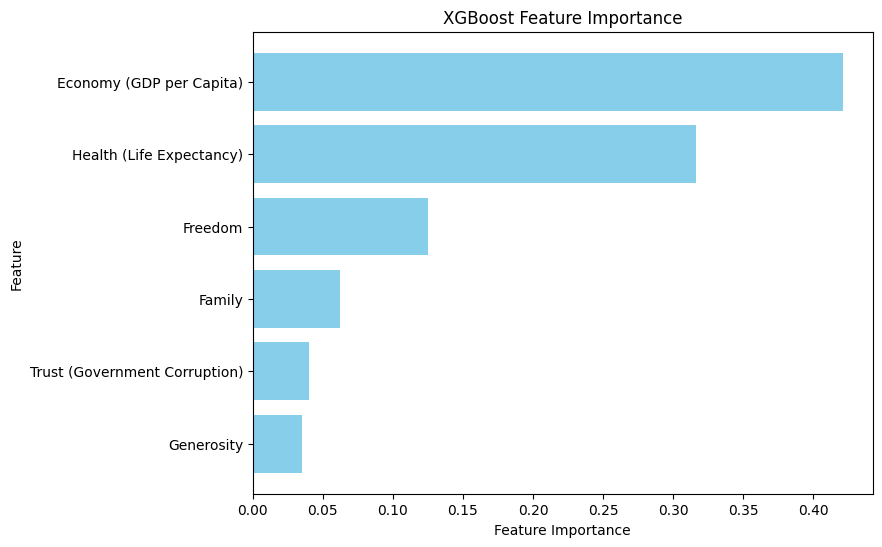

In [118]:
feature_importance = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : feature_importance
}).sort_values(by = 'Importance', ascending = False)


print(importance_df)

plt.figure(figsize = (8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color = 'skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

경제력과 건강이 가장 중요하고 자유도부터는 그 중요성이 굉장히 떨어진다.

마지막으로, 각 그룹별 특징들을 봐보자

In [36]:
group_a = df_all[df_all['Group'] == 'Group A']
group_b = df_all[df_all['Group'] == 'Group B']
group_c = df_all[df_all['Group'] == 'Group C']
group_d = df_all[df_all['Group'] == 'Group D']
group_e = df_all[df_all['Group'] == 'Group E']
group_f = df_all[df_all['Group'] == 'Group F']
filtered_a = group_a[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]
filtered_b = group_b[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]
filtered_c = group_c[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]
filtered_d = group_d[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]
filtered_e = group_e[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]
filtered_f = group_f[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity']]



<ipython-input-60-c70c9f1a2941>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



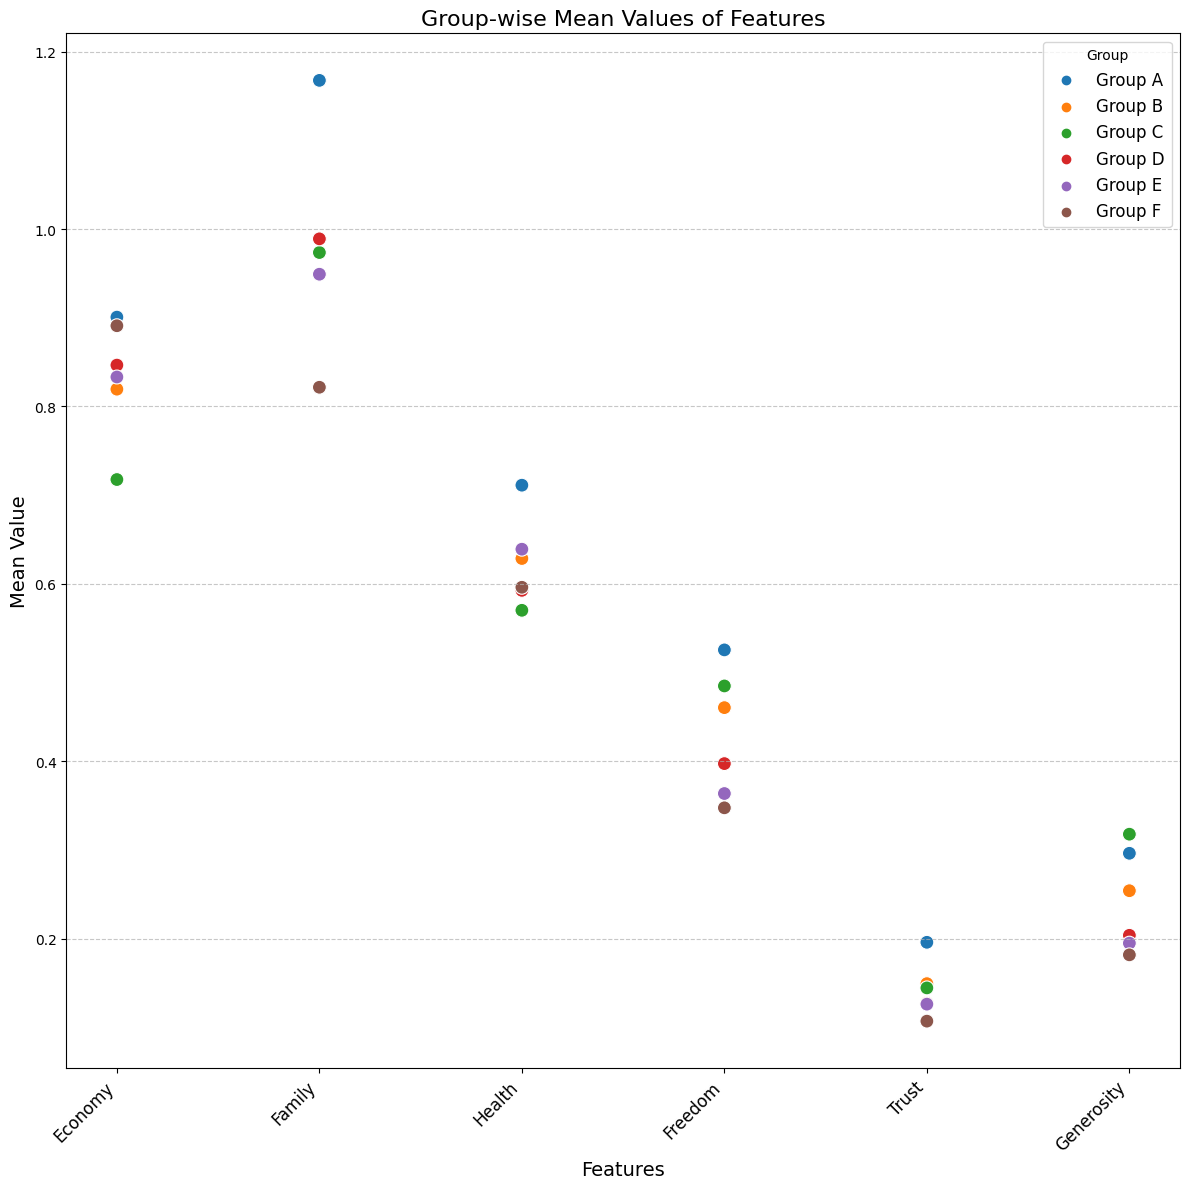

In [60]:
filtered_all = df_2015[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity','Group']]
filtered_all.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 'Health (Life Expectancy)':'Health',
                              'Trust (Government Corruption)' : 'Trust'}, inplace = True)

group_means = filtered_all.groupby('Group').mean()

group_means_long = group_means.reset_index().melt(id_vars = 'Group', var_name = 'Features', 
                                                  value_name = 'Mean Value')


plt.figure(figsize=(12,12))
sns.scatterplot(data = group_means_long, x = 'Features', y ='Mean Value', hue = 'Group', 
                palette = 'tab10', s = 100)


plt.title("Group-wise Mean Values of Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Mean Value", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Group', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. 1인당 GDP는 그룹A와 그룹 F가 비슷한 수준.
2. 그룹 A는 모든 면에서 1~2위 수준
3. 

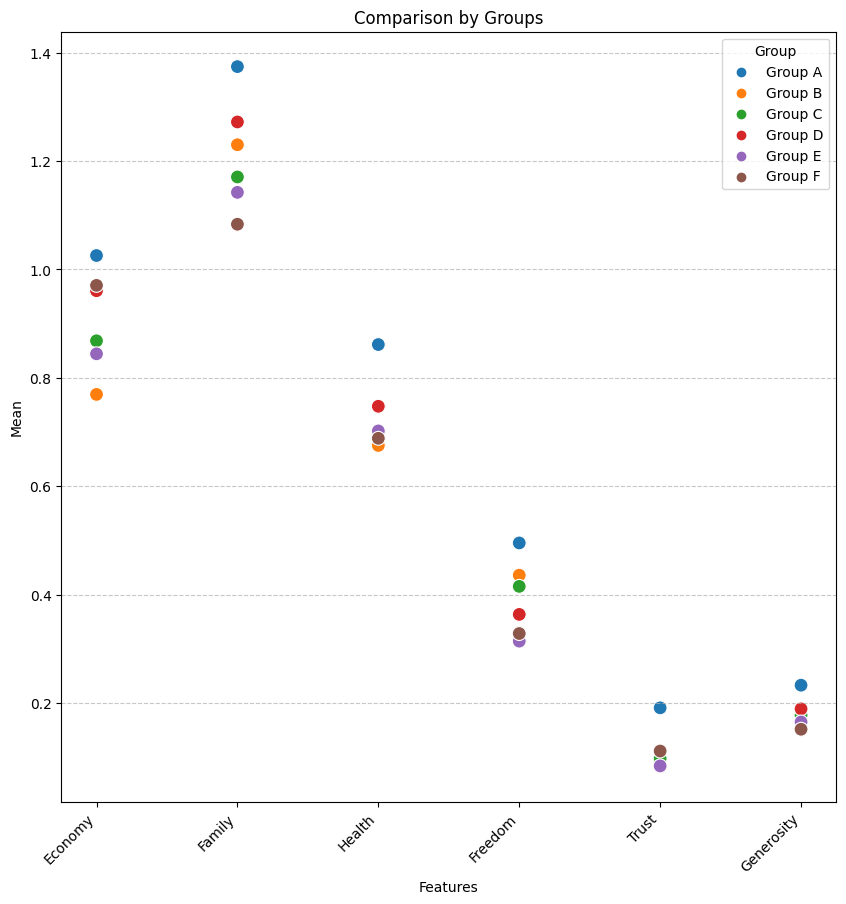

In [73]:
subset_2019 = df_2019[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity', 'Happiness Score']]
subset_2019 = subset_2019.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 'Health (Life Expectancy)':'Health',
                              'Trust (Government Corruption)' : 'Trust'}).copy()

X = subset_2019['Economy'].values.reshape(-1,1)
y = subset_2019['Happiness Score'].values

lr_model = LinearRegression()
lr_model.fit(X, y)
a = lr_model.coef_[0]
b = lr_model.intercept_

line = a * X + b
subset_2019.loc[:,'Distance'] = y - (a * X.flatten() + b)


threshold1 = 0.3
threshold2 = 0.65


def assign_group(distance):
    if distance <= threshold1 and distance >= 0:
        return 'Group C'
    elif distance > threshold1 and distance <= threshold2:
        return 'Group B'
    elif distance > threshold2:
        return 'Group A'
    elif distance < 0 and distance > -threshold1:
        return 'Group D'
    elif distance <- threshold1 and distance >= -threshold2:
        return 'Group E'
    else:
        return 'Group F'

subset_2019.loc[:, 'Group'] = subset_2019['Distance'].apply(assign_group)
subset_2019

subset_2019.drop(columns = ['Distance', 'Happiness Score'], inplace = True)
grouped_2019 = subset_2019.groupby('Group').mean()
melted_2019 = grouped_2019.reset_index().melt(id_vars = 'Group', var_name = 'Features', value_name = 'Group Mean' )


plt.figure(figsize = (10, 10) )
sns.scatterplot(melted_2019, x = 'Features', y = 'Group Mean' , hue = 'Group', s=  100, palette = 'tab10')
plt.title('Comparison by Groups')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Group')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

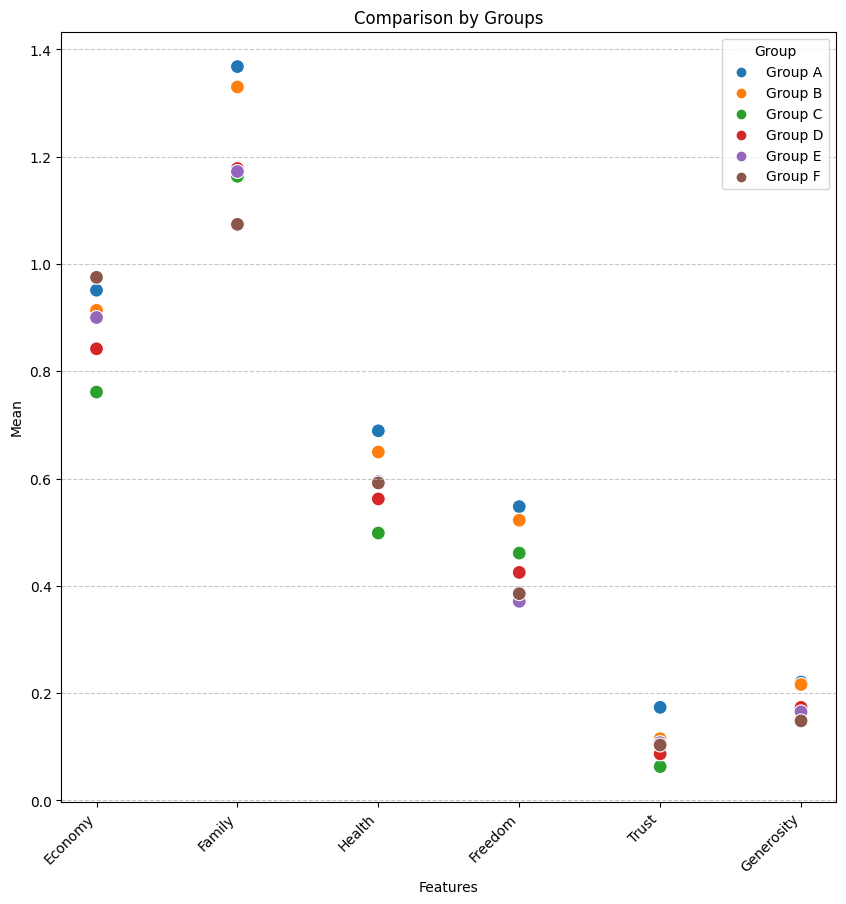

In [74]:
subset_2019 = df_2018[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity', 'Happiness Score']]
subset_2019 = subset_2019.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 'Health (Life Expectancy)':'Health',
                              'Trust (Government Corruption)' : 'Trust'}).copy()

X = subset_2019['Economy'].values.reshape(-1,1)
y = subset_2019['Happiness Score'].values

lr_model = LinearRegression()
lr_model.fit(X, y)
a = lr_model.coef_[0]
b = lr_model.intercept_

line = a * X + b
subset_2019.loc[:,'Distance'] = y - (a * X.flatten() + b)


threshold1 = 0.3
threshold2 = 0.65


def assign_group(distance):
    if distance <= threshold1 and distance >= 0:
        return 'Group C'
    elif distance > threshold1 and distance <= threshold2:
        return 'Group B'
    elif distance > threshold2:
        return 'Group A'
    elif distance < 0 and distance > -threshold1:
        return 'Group D'
    elif distance <- threshold1 and distance >= -threshold2:
        return 'Group E'
    else:
        return 'Group F'

subset_2019.loc[:, 'Group'] = subset_2019['Distance'].apply(assign_group)
subset_2019

subset_2019.drop(columns = ['Distance', 'Happiness Score'], inplace = True)
grouped_2019 = subset_2019.groupby('Group').mean()
melted_2019 = grouped_2019.reset_index().melt(id_vars = 'Group', var_name = 'Features', value_name = 'Group Mean' )


plt.figure(figsize = (10, 10) )
sns.scatterplot(melted_2019, x = 'Features', y = 'Group Mean' , hue = 'Group', s=  100, palette = 'tab10')
plt.title('Comparison by Groups')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Group')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

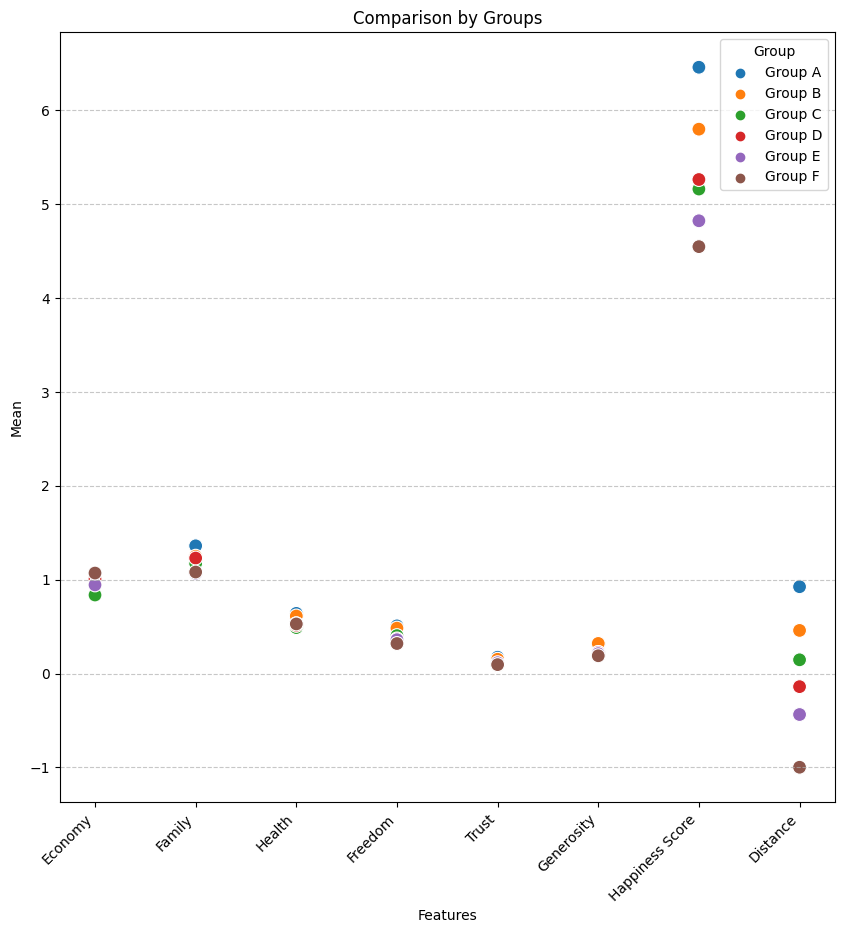

In [90]:
subset_2019 = df_2017[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                     'Trust (Government Corruption)', 'Generosity', 'Happiness Score']]
subset_2019 = subset_2019.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 'Health (Life Expectancy)':'Health',
                              'Trust (Government Corruption)' : 'Trust'}).copy()

X = subset_2019['Economy'].values.reshape(-1,1)
y = subset_2019['Happiness Score'].values

lr_model = LinearRegression()
lr_model.fit(X, y)
a = lr_model.coef_[0]
b = lr_model.intercept_

line = a * X + b
subset_2019.loc[:,'Distance'] = y - (a * X.flatten() + b)


threshold1 = 0.3
threshold2 = 0.65


def assign_group(distance):
    if distance <= threshold1 and distance >= 0:
        return 'Group C'
    elif distance > threshold1 and distance <= threshold2:
        return 'Group B'
    elif distance > threshold2:
        return 'Group A'
    elif distance < 0 and distance > -threshold1:
        return 'Group D'
    elif distance <- threshold1 and distance >= -threshold2:
        return 'Group E'
    else:
        return 'Group F'

subset_2019.loc[:, 'Group'] = subset_2019['Distance'].apply(assign_group)
subset_2019


grouped_2019 = subset_2019.groupby('Group').mean()
melted_2019 = grouped_2019.reset_index().melt(id_vars = 'Group', var_name = 'Features', value_name = 'Group Mean' )


plt.figure(figsize = (10, 10) )
sns.scatterplot(melted_2019, x = 'Features', y = 'Group Mean' , hue = 'Group', s=  100, palette = 'tab10')
plt.title('Comparison by Groups')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Group')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

1. Group A는 어디서든 항상 높게 나타난다.
2. Group F는 경제력 만큼은 A와 비슷하다
3. Group C는 경제력은 거의 최하위권
4. Group B는 보통은 높게 나타나는 편

핵심 인사이트: 경제력이 비슷한 group A와 group B지만 다른 요소에서 큰 차이가 남으로 행복지수가 굉장히 차이가 나진다. 

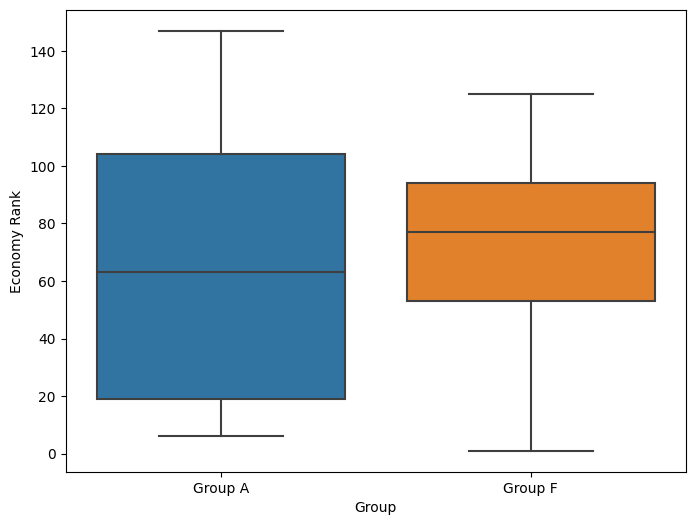

In [93]:
subset_2019['Economy Rank'] = subset_2019['Economy'].rank( ascending =  False, method = 'dense').astype(int)
group_a = subset_2019[subset_2019['Group'] =='Group A']
group_f = subset_2019[subset_2019['Group'] =='Group F']
concated = pd.concat( (group_a, group_f) , axis =0)

plt.figure(figsize = (8,6))
sns.boxplot(data = concated, x = 'Group', y = 'Economy Rank')
plt.show()


In [94]:
group_f

,Economy,Family,Health,Freedom,Trust,Generosity,Happiness Score,Distance,Group,Economy Rank
33,1.870766,1.274297,0.710098,0.604131,0.439299,0.330474,6.375,-0.987201,Group F,1
37,1.632952,1.259699,0.632106,0.496338,0.215160,0.228290,6.105,-0.717356,Group F,4
71,1.286012,1.343133,0.687763,0.175864,0.036637,0.078402,5.324,-0.710789,Group F,43
83,1.289487,1.239415,0.810199,0.095731,0.043290,0.000000,5.227,-0.815678,Group F,42
85,1.315175,1.367043,0.795844,0.498465,0.015869,0.095103,5.195,-0.905990,Group F,38
96,1.054699,1.384789,0.187080,0.479247,0.072509,0.139362,4.829,-0.680699,Group F,77
100,1.161459,1.434379,0.708218,0.289232,0.011052,0.113178,4.714,-1.038049,Group F,56
103,1.156873,0.711551,0.639333,0.249323,0.048761,0.387243,4.692,-1.049639,Group F,57
104,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,4.644,-0.732888,Group F,83
111,1.102710,0.978613,0.501180,0.288556,0.107216,0.199637,4.497,-1.121687,Group F,68
